# Final Exam
## Author: Wenhui Zeng

# Introduction

This project is for final exam. The goal of this project is to predicts charges based on patient's age, sex,bmi, number of children, smoke status and region. Different machine learning algorithms were used to build the model. In addtion, different methods were used to apply the machine learning algorithms. The test error, training error and validation error were used as model performance accessment. The report has three big part: Introduction, Methods, Results and Conclusion.
The exploratory data analysis was in the introduction part. The methods part was divided into three parts: h2o machine learning, sklearn cross-validation hyper parameter tuning examples and deep learning. The results give the final validation, test and training error. The best model were selected based on the result table. Mean square error is choosen as our loss function. I will explain in the following sections. 

## Exploratory Data Analysis

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn import datasets
import textwrap
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import h2o

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()
data.shape

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)

In [5]:
data.isnull().sum()
data['children']=data['children'].astype('category')
data['smoker']=data['smoker'].astype('category')
data['region'] = data['region'].astype('category')
data['sex'] = data['sex'].astype('category')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [7]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

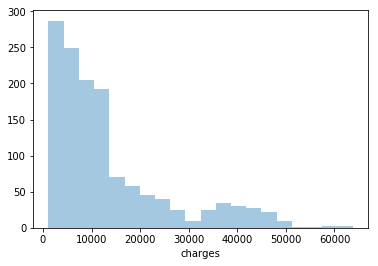

In [11]:
sns.distplot(data['charges'], bins=20, kde=False);

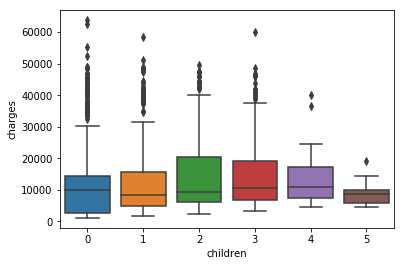

In [12]:
sns.boxplot(x="children", y="charges", data=data)

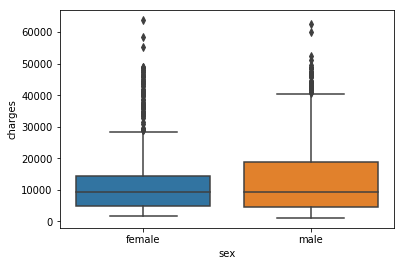

In [13]:
sns.boxplot(x='sex',y='charges',data=data)

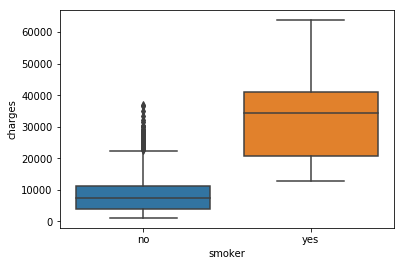

In [14]:
sns.boxplot(x='smoker',y='charges',data=data)

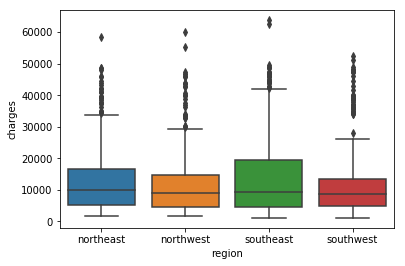

In [15]:
sns.boxplot(x='region',y='charges',data=data)

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


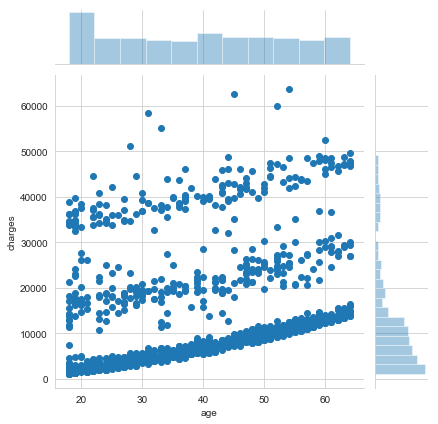

In [16]:
sns.set_style('whitegrid')
sns.jointplot(x='age',y='charges',data=data)

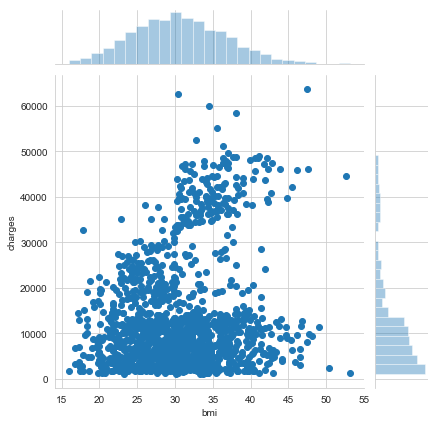

In [17]:
sns.jointplot(x='bmi',y='charges',data=data)

## Summary of EDA

From the descriptive analysis, there is total 1338 observations with 7 variables. No missing values are in the dataset.
From the exploratory analysis, the maximum age is 64 years old and minimum age is 18 years old. The average is 39 years old. From the joinplot, the age is uniform distributed.     
As for the bmi, the highest is 53 and lowest is 15.96 with an average of 30.7. Most of patients are overweight, from the joinplot, the bmi is normal distributed with a mean of 30.7.    
The charge is our outcome variable. The highest is 63770 and the lowest is 1121 with an average of 13270. It is exponential distributed.    
The region, smoke status and number of children are categorical variables. There are 50% of male and 50% of female. The people from four regions are evenly distributed. About 42.9% patient has no child, and 24.2% patient has only 1 child, 17.9% has 2 children, 11.% patient has 3 children and the 3.2% has more than three children. The variable, children, sex, region, smoke status were converted to categorical variable. BMI, charges and age are numerical variables.

As for the univariate analysis from the boxplot and jointplot, it looks like there is a correlation between charges and age, charges and smoke status. The correlation between charges and other predictors are not very strong.

The exploratory analysis show that there is no necessary to add sex and region in the final model since the correlation is not very strong.

# Method

The common loss function for regression is mean square error which derived from OLS method. The estimator calcualted using OLS is the same as maximum likelihood method. It is also mathematically convenient. The common loss function for logistic regression is log loss. But our problem is regression problem since the outcome is continuous. So the loss function is mean square error. 

The evaluation metrics are test error,validation error and training error using root mean square error.

The methods are in three domains.
Part I: H2o machine learning
Part II: cross validation using sklearn
Part III: Deep learning

The data manipulation part is before model building.

Part I
In this sections, all the machine learning methods were utilized h2o. Five folds cross validation was performed on training data. The mean cross validation root mean square error (RMSE) was evaludated in the result table. The methods used in h2o are gradient boosting regression trees (GBM), random forest trees, linear regression, lasso, ridge, elastic net,  elastic net with lambda search, random forest with hyper parameter tuning, GBM with hyper parameter tuning.    
The hyper parameter tuning is based on h2o grid search. The data was split into train, test and validation. The results table shows the CV mean RMSE , test and validation error to help me compare between different models. The grid search will provide best model automatically. The autoML is one of the convinient methods, it automatically calculated for all possible results. The results will be analyzed in the results section.

Part II
In this part, I applied cross validation using sklearn. Cross validation is very useful when we are tuning hyper parameter, the example listed in this section were all about hyper tuning including random forest, gradient boosting. Sklearn have different ways to apply cross validation. If I used sklearn, I split the data into training and test, no validation data set. The mean RMSE was generated for model selection. Cross validation is useful when comes to hyper parameter tuning. According to the documentation, we can specified nfold=k to do k fold cross validation. The best model was selected by the software. 

Part III
In this section, deep learning with netural network was applied. Three models include simple NN, a little complex one and one with regularization. I tried to run deep learning on my computer. However, it took forever. So I used google collaboration to run tensorflow. 



## Part I H2o machine learning

### data preparation

In [18]:
h2o.init(ip='localhost',
         port = 54321,
         nthreads = -1,  # use all available threads
         max_mem_size = '2G') # can also specify mem size 

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,20 hours 8 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,2 months and 24 days
H2O cluster name:,H2O_from_python_wenhuizeng_7fej6m
H2O cluster total nodes:,1
H2O cluster free memory:,1.042 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [19]:
df = h2o.import_file('insurance.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [56]:
df['children'] = df['children'].asfactor()
df['smoker'] = df['smoker'].asfactor()
df['region'] = df['region'].asfactor()
train, test, validate = df.split_frame([0.6,0.2], seed=12)
train.columns
df.types

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

{'age': 'int',
 'sex': 'enum',
 'bmi': 'real',
 'children': 'enum',
 'smoker': 'enum',
 'region': 'enum',
 'charges': 'real'}

(51, 7)

### Linear Regression No Penalty

In [21]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
outcome = 'charges'
inputs = ['age', 'bmi', 'smoker','children']
glm_mod1 = H2OGeneralizedLinearEstimator(model_id = 'glm_1',
                                  family = 'gaussian',
                                  lambda_=0,
                                  compute_p_values = True,nfolds=5)
## Fit model
glm_mod1.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [22]:
glm_mod1.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,4079.5964,161.34181,4355.2046,4028.3596,3990.4375,3725.0789,4298.9014
1,mean_residual_deviance,3.53129E7,3120696.0,4.1710472E7,3.3619032E7,3.4409972E7,2.8640142E7,3.8184888E7
2,mse,3.53129E7,3120696.0,4.1710472E7,3.3619032E7,3.4409972E7,2.8640142E7,3.8184888E7
3,null_deviance,2.49378714E10,1.47393882E9,2.08836731E10,2.67454177E10,2.61533225E10,2.55316111E10,2.53753344E10
4,r2,0.7682755,0.02434332,0.702128,0.7844776,0.7683147,0.78861,0.7978471
5,residual_deviance,5.7041981E9,2.88793056E8,6.2148603E9,5.7488543E9,6.0561546E9,5.3843466E9,5.1167754E9
6,rmse,5930.7197,264.06866,6458.3647,5798.192,5866.0015,5351.6484,6179.3926
7,rmsle,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
glm_mod1.cross_validation_metrics_summary()[1][6]
glm_mod1._model_json['output']['validation_metrics']['RMSE'],
glm_mod1.model_performance(test_data=test)['RMSE']

'5930.7197'

(6149.452317769408,)

6745.391599527368

In [24]:
def get_results(x1):
    print("\n{0:20}   {1:4}     {2:4}    {3:4}".format('Model','CV Mean RMSE','Validation RMSE', 'Test RMSE'))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<7.5}        {2:<7.5}         {3:<7.5}".format(i,x1[i][0],x1[i][1],x1[i][2]))
result_scores={}
result_scores['Linear Regression'] = \
            (glm_mod1.cross_validation_metrics_summary()[1][6],
             glm_mod1._model_json['output']['validation_metrics']['RMSE'],
            glm_mod1.model_performance(test_data=test)['RMSE'])


### Ridge regression (L2)

In [25]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_mod2 = H2OGeneralizedLinearEstimator(model_id = 'glm_2',
                                  family = 'gaussian',
                                  lambda_=1,
                                 alpha = 0,
                                        nfolds=5)
## Fit model
glm_mod2.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate)


result_scores['Ridge Regression'] = (glm_mod2.cross_validation_metrics_summary()[1][6],           
             glm_mod2._model_json['output']['validation_metrics']['RMSE'],
            glm_mod2.model_performance(test_data=test)['RMSE'])
result_scores

glm Model Build progress: |███████████████████████████████████████████████| 100%


{'Linear Regression': ('5930.7197', 6149.452317769408, 6745.391599527368),
 'Ridge Regression': ('10056.158', 9338.775119626827, 9373.154162926385)}

### Lasso （L1)

In [26]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_mod3 = H2OGeneralizedLinearEstimator(model_id = 'glm_3',
                                  family = 'gaussian',
                                  lambda_=1,
                                 alpha = 1,
                                        nfolds=5)
## Fit model
glm_mod3.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate)


result_scores['Lasso Regression'] = (glm_mod3.cross_validation_metrics_summary()[1][6],              
             glm_mod3._model_json['output']['validation_metrics']['RMSE'],
            glm_mod3.model_performance(test_data=test)['RMSE'])

glm Model Build progress: |███████████████████████████████████████████████| 100%


### Elastic Net

In [27]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_mod4 = H2OGeneralizedLinearEstimator(model_id = 'glm_4',
                                  family = 'gaussian',
                                  lambda_=1,
                                 alpha = 0.5,
                                        nfolds=5)
## Fit model
glm_mod4.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate)


result_scores['Elastic Net'] = \
            (glm_mod4.cross_validation_metrics_summary()[1][6],            
             glm_mod4._model_json['output']['validation_metrics']['RMSE'],
            glm_mod4.model_performance(test_data=test)['RMSE'])



glm Model Build progress: |███████████████████████████████████████████████| 100%


### Elasstic Net Lambda Search

In [28]:
from h2o.grid.grid_search import H2OGridSearch
## Setup target and inputs

## set up grid
glm_parms = {'alpha': [0,0.25,0.5,0.75,1],
            'lambda':[0.5,1,2,3,4,5,6,10,7,9]}
## add potential interaction terms

glm_mod5 = H2OGridSearch(model = H2OGeneralizedLinearEstimator(family = 'gaussian',
                                                        lambda_search = True,
                                                               nfolds=5
                                                              ), hyper_params = glm_parms)
## Fit model
glm_mod5.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate
          )

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [29]:
glm_best = glm_mod5.get_grid(sort_by='RMSE')[0]
result_scores['Regularized lambda search'] = \
            (glm_best.cross_validation_metrics_summary()[1][6],            
             glm_best._model_json['output']['validation_metrics']['RMSE'],
            glm_best.model_performance(test_data=test)['RMSE'])

### Random Forest

In [30]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
rf = H2ORandomForestEstimator(ntrees=50, max_depth=20,nfolds=5)
# Train model
rf.train(x=inputs, y=outcome, training_frame = train,validation_frame = validate)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [31]:
result_scores['Random forest'] = (rf.cross_validation_metrics_summary()[1][5],
             rf._model_json['output']['validation_metrics']['RMSE'],
             rf.model_performance(test_data=test)['RMSE'])


### Random Forest Hyper Parameter Tuning

In [32]:
estimator = H2ORandomForestEstimator(
    stopping_tolerance = 0.00001,
    stopping_metric = 'auto',
    balance_classes = True,
    seed = 7,
nfolds=5)

hyper_parameters = {'ntrees':[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    'max_depth':[2,3,4,5,6]}

criteria = {"strategy": "RandomDiscrete", 
            "stopping_tolerance": 0.00001,
            "stopping_metric": "misclassification"}

rf_search = H2OGridSearch(model = estimator, 
                            hyper_params = hyper_parameters,
                            search_criteria = criteria)

rf_search.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [34]:
rf_grid = rf_search.get_grid(sort_by='RMSE')

# Grab the top GBM model, chosen by validation RMSE 
best_rf= rf_grid.models[0]

result_scores['Random Forest GridSearch'] = (best_rf.cross_validation_metrics_summary()[1][5],
             best_rf._model_json['output']['validation_metrics']['RMSE'],
             best_rf.model_performance(test_data=test)['RMSE'])

In [35]:
best_rf.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,3581.9697,124.00147,3718.265,3660.6902,3276.2158,3752.615,3502.063
1,mean_residual_deviance,2.7572864E7,1897070.5,2.787498E7,3.2282272E7,2.4124984E7,2.7342688E7,2.6239402E7
2,mse,2.7572864E7,1897070.5,2.787498E7,3.2282272E7,2.4124984E7,2.7342688E7,2.6239402E7
3,r2,0.8171102,0.011009061,0.823663,0.79501474,0.80880547,0.8418309,0.81623673
4,residual_deviance,2.7572864E7,1897070.5,2.787498E7,3.2282272E7,2.4124984E7,2.7342688E7,2.6239402E7
5,rmse,5244.922,178.41081,5279.6763,5681.749,4911.719,5229.0234,5122.441
6,rmsle,0.56412333,0.018292978,0.5369125,0.61119884,0.5483644,0.5539149,0.5702259


### Gradient Boosting Trees

In [36]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_regressor = H2OGradientBoostingEstimator(distribution="gaussian",
                                 ntrees=10, max_depth=3,
                                 min_rows=2, learn_rate=0.2,nfolds=5)
gbm_regressor.train(x = inputs,
                    y = outcome,
                    training_frame = train,
                    validation_frame = validate)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [37]:
result_scores['GBM'] = (gbm_regressor.cross_validation_metrics_summary()[1][5], 
                        gbm_regressor._model_json['output']['validation_metrics']['RMSE'],
             gbm_regressor.model_performance(test_data=test)['RMSE'])

### Gradient Boosting Trees Hyperparameter Tuning

In [38]:
gbm_hyperparms = {'ntrees':[3,4,5,6,8,10,12,14],
                 'max_depth':[2,3,4],
                 'learn_rate':[0.05,0.1,0.15,0.2,0.3,0.4]}

## describe model
gbmm_grid = H2OGridSearch(model =  H2OGradientBoostingEstimator(distribution="gaussian",
                                                        min_rows=2,nfolds=5),
                  hyper_params = gbm_hyperparms)
## fit model with validation frame
gbmm_grid.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [39]:
gbm_gridperf1 = gbmm_grid.get_grid(sort_by='RMSE')

# Grab the top GBM model, chosen by validation RMSE 
best_gbm1 = gbm_gridperf1.models[0]

In [40]:
result_scores['GBM lambda search'] = (best_gbm1.cross_validation_metrics_summary()[1][5],                                    
             best_gbm1._model_json['output']['validation_metrics']['RMSE'],
            best_gbm1.model_performance(test)['RMSE'])

### Auto-ML

In [41]:
from h2o.automl.autoh2o import H2OAutoML
## run for 30 seconds
automl_1 = H2OAutoML(max_runtime_secs = 100)
## train the model
automl_1.train(x = inputs,
               y = outcome,
               training_frame = train,
               validation_frame = validate)
## print best models
automl_1.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_3_AutoML_20190510_100453,1.8276e+07,4275.04,1.8276e+07,2268.83,0.427989
XGBoost_grid_1_AutoML_20190510_100453_model_1,1.84014e+07,4289.68,1.84014e+07,2393.04,0.423626
XGBoost_grid_1_AutoML_20190510_100453_model_8,1.85636e+07,4308.55,1.85636e+07,2292.4,0.447058
XGBoost_1_AutoML_20190510_100453,1.8641e+07,4317.52,1.8641e+07,2271.69,0.434427
XGBoost_grid_1_AutoML_20190510_100453_model_7,1.88253e+07,4338.81,1.88253e+07,2274.06,0.434697
XGBoost_grid_1_AutoML_20190510_100453_model_5,1.88678e+07,4343.71,1.88678e+07,2317.27,0.429415
XGBoost_grid_1_AutoML_20190510_100453_model_4,1.90175e+07,4360.91,1.90175e+07,2443.61,0.417409
XGBoost_grid_1_AutoML_20190510_100453_model_6,1.90726e+07,4367.22,1.90726e+07,2310.3,0.444604
XGBoost_2_AutoML_20190510_100453,1.92409e+07,4386.45,1.92409e+07,2387.15,0.454875
GBM_2_AutoML_20190510_100453,1.96141e+07,4428.79,1.96141e+07,2503.93,0.470031


In [42]:
automl_1.leader.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2268.895,45.009773,2172.9329,2356.7878,2226.2144,2283.8896,2304.65
1,mean_residual_deviance,1.8272008E7,1671295.8,1.7233694E7,2.258229E7,1.8251254E7,1.7869106E7,1.5423691E7
2,mse,1.8272008E7,1671295.8,1.7233694E7,2.258229E7,1.8251254E7,1.7869106E7,1.5423691E7
3,r2,0.8787006,0.013280999,0.87516683,0.8465709,0.8766793,0.89910597,0.89598006
4,residual_deviance,1.8272008E7,1671295.8,1.7233694E7,2.258229E7,1.8251254E7,1.7869106E7,1.5423691E7
5,rmse,4266.013,191.22836,4151.3486,4752.0825,4272.149,4227.1865,3927.3008
6,rmsle,0.42576295,0.030633876,0.44733024,0.4849817,0.36487424,0.3883648,0.44326374


In [43]:
automl_1.leader.model_performance(test)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 30616595.051155988
RMSE: 5533.2264594137105
MAE: 2815.916485767288
RMSLE: 0.484977745469379
Mean Residual Deviance: 30616595.051155988


In [59]:
result_scores['Auto ML'] = (automl_1.leader.cross_validation_metrics_summary()[1][5],  "",""                                           
            )

## PART II Sklearn Cross Validation

### Random Forest

In [45]:
outcome = 'charges'
inputs = ['age', 'sex', 'bmi', 'children']
fl = "charges ~ " + " + ".join(inputs)
fl
from patsy import dmatrices
Y,X = dmatrices(fl,data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                     np.ravel(Y), # prevents dimensionality error later!
                     test_size=0.25,
                     random_state=42)

'charges ~ age + sex + bmi + children'

In [46]:
from sklearn import ensemble

from sklearn.model_selection import GridSearchCV
## specify grid
parameters = {'n_estimators':(40, 50, 60, 70, 80, 90, 100,110,120),
              'max_depth':(2,3,4)}


rf_model = ensemble.RandomForestRegressor(random_state=32)

rf_fit = GridSearchCV(rf_model,
                   parameters,
                   cv=5,
                   return_train_score=True)
rf_fit.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=32, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (40, 50, 60, 70, 80, 90, 100, 110, 120), 'max_depth': (2, 3, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [47]:
rf_fit.best_params_

{'max_depth': 2, 'n_estimators': 40}

In [48]:
def get_cv_results(x1):
    print("\n{0:20}   {1:4}    {2:4}".format('Model','Train','Test'))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<6.4}   {2:<6.4}".format(i,x1[i][0],x1[i][1]))

In [49]:
import math
cv_result_scores={}
cv_result_scores['RandomForest_CV'] = \
            (math.sqrt(sklearn.metrics.mean_squared_error(y_train,rf_fit.predict(x_train))),
             math.sqrt(sklearn.metrics.mean_squared_error(y_test,rf_fit.predict(x_test))))
get_cv_results(cv_result_scores)


Model                  Train    Test
-------------------------------------------
RandomForest_CV        1.125e+04   1.155e+04


### Gradient Boosting Machine

In [50]:
gbm_hyperparms = {'n_estimators':(1,2,3,4,5,6,7,8),
                 'max_depth':[2,3,4,5,6]}

## describe model
gbm_grid = ensemble.GradientBoostingRegressor()


clf = GridSearchCV(gbm_grid,
                   gbm_hyperparms,
                   cv=5,
                   return_train_score=True)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (1, 2, 3, 4, 5, 6, 7, 8), 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
clf.best_params_
cv_result_scores['GBM_CV'] = \
            (math.sqrt(sklearn.metrics.mean_squared_error(y_train,clf.predict(x_train))),
             math.sqrt(sklearn.metrics.mean_squared_error(y_test,clf.predict(x_test))))


{'max_depth': 2, 'n_estimators': 8}

## Part III Deep Learning 

### Neural Networks without regularization

In [29]:
from sklearn.model_selection import train_test_split
## initial split 
X_train0, X_test = train_test_split(X, train_size = 0.8)
Y_train0, Y_test = train_test_split(Y, train_size = 0.8)
## another split!
X_train, X_validate = train_test_split(X_train0, train_size = 0.75)
Y_train, Y_validate = train_test_split(Y_train0, train_size = 0.75)
## check dims
X_train.shape
Y_train.shape
X_test.shape
Y_test.shape
X_validate.shape
Y_validate.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(802, 13)

(802, 1)

(268, 13)

(268, 1)

(268, 13)

(268, 1)

In [30]:
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf

def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(1,
                           activation = 'linear',
                           input_dim=x_train.shape[1]))
    model.compile(optimizer ='SGD', 
                  loss = 'mse',
                  metrics = ['mae'])
    return model

Using TensorFlow backend.


In [31]:
from sklearn import preprocessing
trans_1 = preprocessing.StandardScaler().fit(X_train)
X_train_s = trans_1.transform(X_train) 
X_validate_s = trans_1.transform(X_validate) 

## fit this model/architecture to my data
regr = build_model1()
regr.fit(X_train_s,
         Y_train,
         epochs = 20,
         verbose=False,
         validation_data = [X_validate_s,Y_validate])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [32]:
regr.summary()
regr.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


[array([[ 2.7920455e-01],
        [-4.3606583e+01],
        [-8.6747910e+01],
        [-1.0928947e+02],
        [-2.2962990e+02],
        [-5.6989856e+02],
        [-1.4985779e+02],
        [-5.3068610e+02],
        [-7.8393427e+02],
        [-8.0447583e+02],
        [ 1.1348671e+02],
        [-3.3664221e+02],
        [-3.4384280e+02]], dtype=float32), array([12763.311], dtype=float32)]

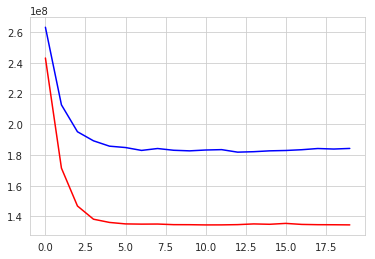

In [33]:
## plot the loss function per epoch
plt.plot(regr.history.history['loss'],
        color='red')
plt.plot(regr.history.history['val_loss'],
        color='blue')

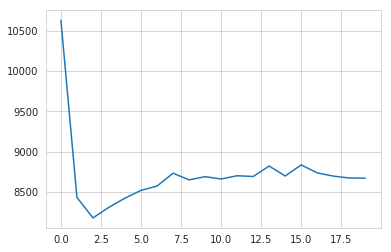

In [34]:
plt.plot(regr.history.history['mean_absolute_error'])

### Model Complex NN

In [ ]:

  
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64,
                           activation = 'linear',
                           input_dim=X_train.shape[1]))
    model.add(layers.Dense(64,
                           activation = 'relu'))
    model.add(layers.Dense(1,
                           activation = 'relu'))
    model.compile(optimizer ='SGD', 
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [88]:
regr2 = build_model2()
regr2.fit(X_train_s,
         Y_train,
         epochs = 20,
         verbose=False,
         validation_data = [X_validate_s,Y_validate])

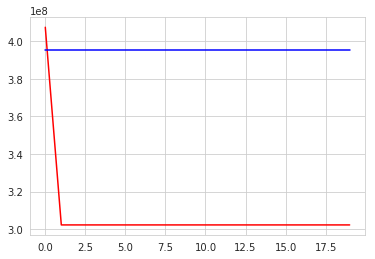

In [89]:
plt.plot(regr2.history.history['loss'],
        color='red')
plt.plot(regr2.history.history['val_loss'],
        color='blue')

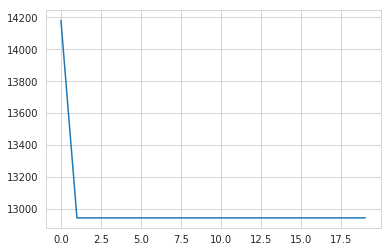

In [90]:
plt.plot(regr2.history.history['mean_absolute_error'])

### NN with Regularization

In [ ]:
from keras.regularizers import l1
l1_penalty = 1
def build_model3():
    model = models.Sequential()
    model.add(layers.Dense(64,
                           activation = 'linear',
                           kernel_regularizer=l1(l1_penalty),
                           input_dim=X_train.shape[1]))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,
                           activation = 'linear'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,
                           activation = 'relu'))
    model.compile(optimizer ='SGD', 
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [151]:
regr3 = build_model3()
regr3.fit(X_train_s,
          Y_train,
          epochs = 20,
          validation_data = [X_validate_s,Y_validate],
          verbose=False
          )

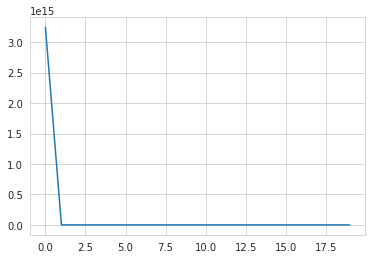

In [152]:
plt.plot(regr3.history.history['mean_absolute_error'])

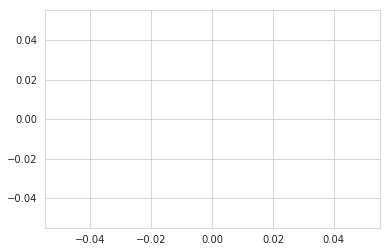

In [153]:
plt.plot(regr3.history.history['loss'],
        color='red')
plt.plot(regr3.history.history['val_loss'],
        color='blue')

# Results

In [60]:
get_results(result_scores)


Model                  CV Mean RMSE     Validation RMSE    Test RMSE
-------------------------------------------
Linear Regression      5930.          6149.5          6745.4 
Ridge Regression       10056          9338.8          9373.2 
Lasso Regression       5946.          6149.2          6745.7 
Elastic Net            8912.          8220.3          8356.8 
Regularized lambda search   5871.          6149.0          6746.0 
Random forest          5192.          5480.5          6014.1 
Random Forest GridSearch   5244.          5419.8          5923.4 
GBM                    4414.          4820.4          5477.5 
GBM lambda search      4096.          4750.3          5423.6 
Auto ML                4266.                                 


In [61]:
get_cv_results(cv_result_scores)


Model                  Train    Test
-------------------------------------------
RandomForest_CV        1.125e+04   1.155e+04
GBM_CV                 1.143e+04   1.171e+04


Part I
The results are not stable. Each time I run the algorithm, the results will be off. I already set the seed when split the data but the issue still comes along. Based on the current results,  it is very important to notice that regularization is not helpful in decreasing the error. Linear, lasso, regularied lambda search, random forest, random forest grid search, GBM and GBM lambda search are all suffered from overfitting. 

For lambda search GBM, the best parameters are: learning rate is 0.3, maximum depth is 3 and number of trees is 10.  For lambda search random forest, the best max_depth is 6 and  the best number of trees is 100. The best model is GBM lambda search since it gives the lowest test RMSE. There is no serious overfitting issues. 

The overfitting issue indicates the model does not generalized well. Because the outcome is exponential distributed. There is only three predictors left, age, bmi and smoke status. I hypothesis that the overfitting problem is associated with the distribution of the outcome. I tried myself at backend, if I didn't apply cross validation, the results will be off and all the results are overfitting. The cross validation overcome this situation by decrease the variance. 

Ridge and Elastic net overcomes the overfitting, but there error rate is higher than other models.

Auto machine learning:
The best model from auto machine learning algorithm is XGBoost_3_AutoML_20190510_100453. The algorithm perform cross validation automatically. The best model also has overfitting issues. 

Part II
I only applied cross validation in random forest and gradient boosting for hyper parameter search.I only split the data into training and testing. The parameters for random forest and gradient boosting machine (GBM) are number of trees (n_estimators) and maximum depth. The results of random forest shows that the best max_depth is 2 and the best number of trees is 40. The result is different from h2o grid search. The results of GBM shows that the best max_depth is 2 and the best number of trees is 8. The result are different from h2o grid search. There is no serious overfitting problems. It indicates the model generalized well.  

I felt like the sklearn results are more stable than h2o. Everytime, I run it, it gives the same result.

Part III

The deep learning models were run on the google collaboration online. 
The first neutral network I tried was a simple one.It only contains one layer, with loss function of means square error and the optimization method is stochastic gradient descent. The metrics is mean absolute error. From the plot, it shows that the model didn't converge well. The mean abosolute error plot was decreased and then increased. I tried with a more complex one by adding another two layers. The new activation function is Rectified Linear Unit. The optimization and loss are same. The mae plot was converged quickly, so as loss plot. But the val loss is not converged. I not sure why. I tried with other parameter myself. They are not perform well.
The final one, I add some regularized penalty L1 on the NN. The MAE looks fine but there is not loss and val loss available. 

I felt like deep learning may not appropriate for prediction models. 

## Conclusion
If I use H2o, I will choose elastic net with lambda equals 1 and alpha equals 0.5. As for sklearn, I will use the random forest with cross validation of maximum depth is 2 and 40 trees. 


Model                  Train    Test
-------------------------------------------
RandomForest_CV        1.125e+04   1.155e+04
GBM_CV                 1.143e+04   1.171e+04
